# CAR PRICE PREDICTION

## Linear Regression

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.shape

(301, 9)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [11]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [12]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [13]:
df.Year.value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [14]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type']= label_encoder.fit_transform(df['Seller_Type'])
df['Transmission']= label_encoder.fit_transform(df['Transmission'])


In [16]:
df['Fuel_Type'].unique()

array([2, 1, 0])

In [17]:
df['Seller_Type'].unique()

array([0, 1])

In [18]:
df['Transmission'].unique()

array([1, 0])

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [20]:
df = df.drop(['Car_Name'], axis = 1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [21]:
x = df.drop(['Selling_Price'], axis = 1)
y = df['Selling_Price']

In [22]:
x.shape

(301, 7)

In [23]:
y.shape

(301,)

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

In [25]:
x_train.shape

(240, 7)

In [26]:
x_test.shape

(61, 7)

In [27]:
y_train.shape

(240,)

In [28]:
y_test.shape

(61,)

## model training

In [29]:
Model = LinearRegression()

In [30]:
Model.fit(x_train,y_train)

LinearRegression()

## model evaluation

In [31]:
training_data_prediction = Model.predict(x_train)

In [32]:
training_data_prediction.shape

(240,)

In [33]:
# rsquared error

r_2_score = metrics.r2_score(y_train,training_data_prediction)
r_2_score

0.8838169193709792

# visulization of actual and predicted

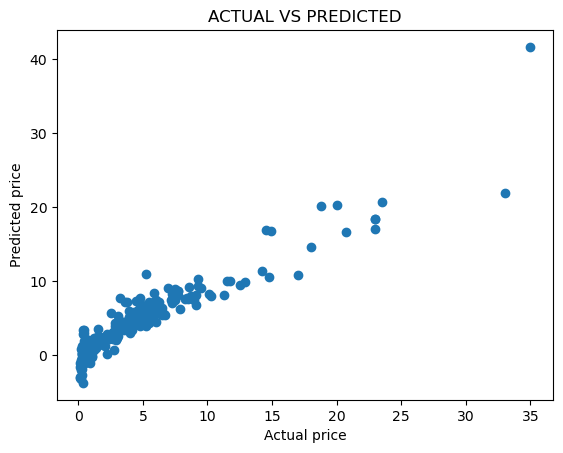

In [34]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("ACTUAL VS PREDICTED")
plt.show()

0.8401532365377782


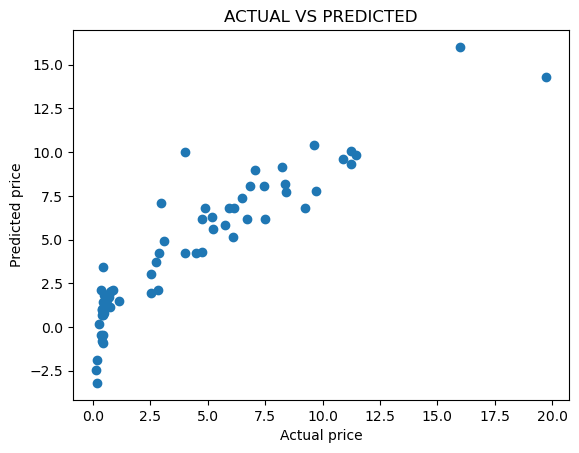

In [35]:
testing_data_prediction = Model.predict(x_test)

# rsquared error

r_2_score = metrics.r2_score(y_test,testing_data_prediction)
print(r_2_score)

plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("ACTUAL VS PREDICTED")
plt.show()

# lasso regression

In [36]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)

Lasso()

In [37]:
lasso_training_data_prediction = lasso_model.predict(x_train)

In [38]:
# rsquared error

r_2_score = metrics.r2_score(y_train,lasso_training_data_prediction)
r_2_score

0.8435873952582827

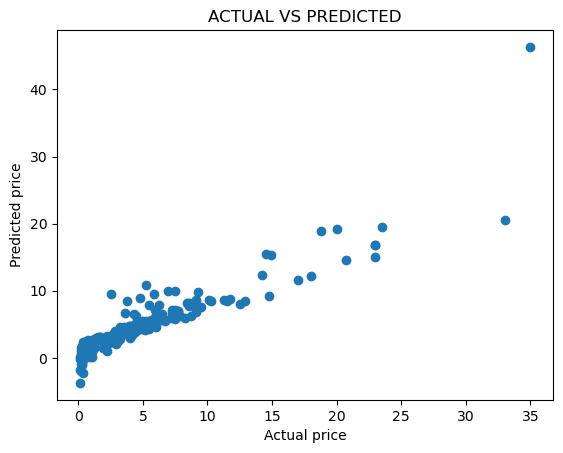

In [39]:
plt.scatter(y_train,lasso_training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("ACTUAL VS PREDICTED")
plt.show()

0.8497457570738539


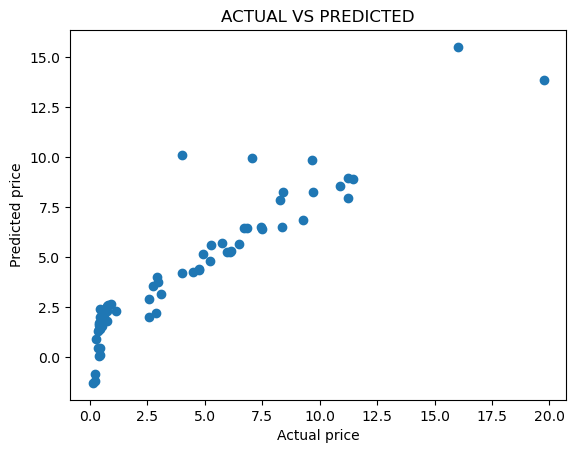

In [40]:
lasso_testing_data_prediction = lasso_model.predict(x_test)

# rsquared error

r_2_score = metrics.r2_score(y_test,lasso_testing_data_prediction)
print(r_2_score)

plt.scatter(y_test,lasso_testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("ACTUAL VS PREDICTED")
plt.show()

In [44]:
Model_1 = LinearRegression()
Model_1.fit(x_train,y_train)
y_pred_1 = Model_1.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
r2 = r2_score(y_test, y_pred_1)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 1.2671998472916908
MSE : 2.935823428932487
RMSE : 1.7134244742422955
R2 : 0.8401532365377782


In [45]:
Model_2 = SVR()
Model_2.fit(x_train,y_train)
y_pred_2 = Model_2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_2)
mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2 = r2_score(y_test, y_pred_2)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 3.241934045568488
MSE : 19.65249164125421
RMSE : 4.433113086901146
R2 : -0.07001911350135703


In [46]:
Model_3 = DecisionTreeRegressor()
Model_3.fit(x_train,y_train)
y_pred_3 = Model_3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
r2 = r2_score(y_test, y_pred_3)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 0.5937704918032786
MSE : 1.2016950819672128
RMSE : 1.0962185375039106
R2 : 0.9345713139189796


In [47]:
Model_4 = RandomForestRegressor()
Model_4.fit(x_train,y_train)
y_pred_4 = Model_4.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_4)
mse = mean_squared_error(y_test, y_pred_4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
r2 = r2_score(y_test, y_pred_4)

print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)
print("R2 :",r2)

MAE : 0.465932786885246
MSE : 0.7103910536065576
RMSE : 0.8428469929984669
R2 : 0.9613213418789236
